In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import time

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all" 

In [3]:
# Load your cleaned sample
df = pd.read_csv('combined_final_sample_new.csv')
df

,is_peak_hour,is_night_hour,PU_is_midtown,PU_is_uptown,PU_is_downtown,DO_is_midtown,DO_is_uptown,DO_is_downtown,vendor_2,is_weekend,passenger_count,trip_distance,fare_amount,extra,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,tip_amount
0,0,0,0,0,0,0,0,1,1,1,-0.402384,-0.161779,-0.254309,-0.902054,-0.265522,0.040308,0.271461,-0.310566,1.82
1,0,1,0,1,0,1,0,0,1,0,-0.402384,-0.370128,-0.379366,-0.340178,-0.265522,0.040308,0.271461,-0.310566,3.42
2,1,0,0,0,1,0,0,0,1,0,-0.402384,-0.374657,-0.337681,0.502637,-0.265522,0.040308,0.271461,-0.310566,2.90
3,0,0,0,0,0,0,0,0,0,1,-0.402384,3.189915,3.068634,0.502637,-0.265522,0.040308,0.271461,-0.310566,0.00
4,0,1,0,0,0,0,1,0,1,0,0.712355,-0.626034,-0.796223,-0.340178,-0.265522,0.040308,0.271461,-0.310566,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,1,1,0,-0.402384,-0.247836,-0.379366,-0.902054,-0.265522,0.040308,0.271461,-0.310566,3.22
29996,0,0,0,0,1,1,0,0,1,0,-0.402384,-0.034959,0.162547,-0.902054,-0.265522,0.040308,0.271461,-0.310566,5.04
29997,0,0,0,0,0,0,0,1,1,1,-0.402384,-0.433538,-0.462738,-0.902054,-0.265522,0.040308,0.271461,-0.310566,2.94
29998,0,0,0,0,1,0,0,0,1,0,-0.402384,-0.528654,-0.629480,-0.902054,-0.265522,0.040308,0.271461,-0.310566,1.00


In [4]:
df.columns
len(df.columns)

Index(['is_peak_hour', 'is_night_hour', 'PU_is_midtown', 'PU_is_uptown',
       'PU_is_downtown', 'DO_is_midtown', 'DO_is_uptown', 'DO_is_downtown',
       'vendor_2', 'is_weekend', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'airport_fee', 'tip_amount'],
      dtype='object')

19

In [5]:
df[df.isna().any(axis=1)]

,is_peak_hour,is_night_hour,PU_is_midtown,PU_is_uptown,PU_is_downtown,DO_is_midtown,DO_is_uptown,DO_is_downtown,vendor_2,is_weekend,passenger_count,trip_distance,fare_amount,extra,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,tip_amount


In [6]:
df["tip_amount"].describe()

count    30000.000000
mean         3.383050
std          3.736364
min          0.000000
25%          1.000000
50%          2.740000
75%          4.200000
max         93.000000
Name: tip_amount, dtype: float64

In [7]:
df[df["tip_amount"]==0]

,is_peak_hour,is_night_hour,PU_is_midtown,PU_is_uptown,PU_is_downtown,DO_is_midtown,DO_is_uptown,DO_is_downtown,vendor_2,is_weekend,passenger_count,trip_distance,fare_amount,extra,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,tip_amount
3,0,0,0,0,0,0,0,0,0,1,-0.402384,3.189915,3.068634,0.502637,-0.265522,0.040308,0.271461,-0.310566,0.0
4,0,1,0,0,0,0,1,0,1,0,0.712355,-0.626034,-0.796223,-0.340178,-0.265522,0.040308,0.271461,-0.310566,0.0
20,0,1,0,0,0,1,0,0,1,0,-0.402384,-0.512801,-0.587795,-0.340178,-0.265522,0.040308,0.271461,-0.310566,0.0
22,0,0,1,0,0,0,0,0,1,1,-0.402384,3.214826,3.068634,-0.902054,3.078956,0.040308,0.271461,-0.310566,0.0
24,0,1,0,0,1,0,0,1,1,0,-0.402384,-0.222925,-0.170938,-0.340178,-0.265522,0.040308,0.271461,-0.310566,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29981,0,1,0,0,0,0,0,0,1,0,-0.402384,2.141378,1.829974,2.469205,-0.265522,0.040308,-3.683772,3.219929,0.0
29985,0,1,1,0,0,0,0,0,1,1,-0.402384,-0.202543,-0.295995,-0.340178,-0.265522,0.040308,0.271461,-0.310566,0.0
29989,0,1,0,0,0,0,0,0,0,0,-0.402384,1.174369,0.954575,3.171550,-0.265522,0.040308,-3.683772,3.219929,0.0
29991,0,1,0,0,0,1,0,0,0,1,-0.402384,3.121975,3.068634,1.204983,3.078956,0.040308,0.271461,3.219929,0.0


<Axes: xlabel='tip_amount', ylabel='Count'>

Text(0.5, 1.0, 'Simulated Distribution of Tip Amount')

Text(0.5, 0, 'Tip Amount ($)')

Text(0, 0.5, 'Frequency')

(0.0, 50.0)

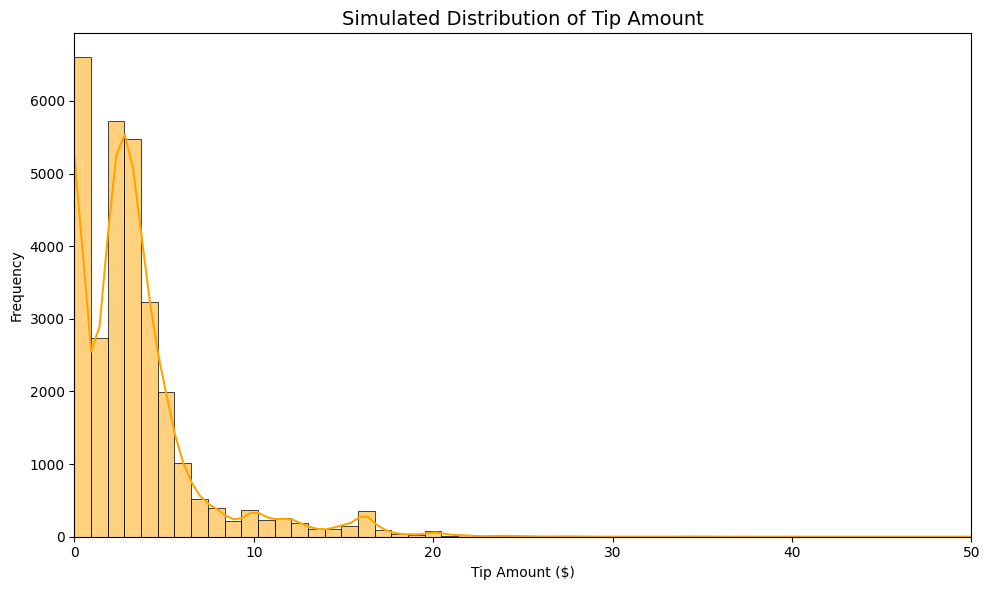

In [8]:
import seaborn as sns 

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df["tip_amount"], bins=100, kde=True, ax=ax, color='orange', edgecolor='black')

ax.set_title('Simulated Distribution of Tip Amount', fontsize=14)
ax.set_xlabel('Tip Amount ($)')
ax.set_ylabel('Frequency')
ax.set_xlim(0, 50)  # 裁剪右尾
plt.tight_layout()
plt.show()

In [9]:
feature_cols = [
    'is_peak_hour', 'is_night_hour', 'PU_is_midtown', 'PU_is_uptown',
       'PU_is_downtown', 'DO_is_midtown', 'DO_is_uptown', 'DO_is_downtown',
       'vendor_2', 'is_weekend', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'airport_fee', 'tip_amount'
]

target_col = 'tip_amount'


# Linear Regression

In [253]:
from sklearn.linear_model import LinearRegression

X = df[feature_cols]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [256]:
model = LinearRegression()
model.fit(X_train, y_train)


# 打印系数
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient for trip_distance: {model.coef_[0]:.4f}")

# 可视化回归直线
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x=X['fare_amount'], y=y, alpha=0.3)
# plt.plot(X, model.predict(X), color='red', linewidth=2)
# plt.xlabel("fare amount")
# plt.ylabel("Tip Amount")
# plt.title("Linear Regression: fare amount vs Tip")
# plt.show()

LinearRegression()

Intercept: 2.8259
Coefficient for trip_distance: -0.2923


In [257]:
y_pred = model.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.4f}")

# statsmodels 显著性分析
import statsmodels.api as sm
X_sm = sm.add_constant(X)
ols_model = sm.OLS(y, X_sm).fit()
print(ols_model.summary())  # 查看 coef, p-value, R² 等

R²: 0.4076
RMSE: 2.9426
                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1377.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:42:26   Log-Likelihood:                -73850.
No. Observations:               30000   AIC:                         1.477e+05
Df Residuals:                   29983   BIC:                         1.479e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const   

# Logist regression

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [112]:
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]  # 概率

# 打印结果
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print("AUC-ROC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

RMSE: 0.6055
R²: -1.1811
AUC-ROC: 0.580297694397687
Confusion Matrix:
 [[ 528  755]
 [1445 3272]]
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.41      0.32      1283
           1       0.81      0.69      0.75      4717

    accuracy                           0.63      6000
   macro avg       0.54      0.55      0.54      6000
weighted avg       0.70      0.63      0.66      6000



# XGBoost

Baseline model

In [10]:
# Data preparation
X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model setup
model = xgb.XGBRegressor(
    objective='reg:squaredlogerror',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

start_time_total = time.time()

start_time_train = time.time()
_ = model.fit(X_train, y_train)
end_time_train = time.time()

start_time_pred = time.time()
y_pred = model.predict(X_test)
end_time_pred = time.time()

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

end_time_total = time.time()

print(f"Baseline Model Result")
print(f"• RMSE: {rmse:.4f}")
print(f"• R² Score: {r2:.4f}")
print(f"Training time: {end_time_train - start_time_train:.2f} seconds")
print(f"Prediction time: {end_time_pred - start_time_pred:.2f} seconds")
print(f"Total time: {end_time_total - start_time_total:.2f} seconds")

Baseline Model Result
• RMSE: 1.0067
• R² Score: 0.9254
Training time: 0.24 seconds
Prediction time: 0.01 seconds
Total time: 0.25 seconds


In [11]:
# Create a small validation set (20% of X_test)
X_val_small = X_test.sample(frac=0.2, random_state=42)
y_val_small = y_test.loc[X_val_small.index]

# Define the model
model = xgb.XGBRegressor(
    objective='reg:squaredlogerror',
    n_estimators=1000,  # Large enough for early stopping
    max_depth=6,
    learning_rate=0.05,
    early_stopping_rounds=50,
    random_state=42
)

# Start profiling
start_time_total = time.time()

# Train the model
start_time_train = time.time()
model.fit(
    X_train, y_train,
    eval_set=[(X_val_small, y_val_small)],
    verbose=False
)
end_time_train = time.time()

# Predict on the full X_test
start_time_pred = time.time()
y_pred = model.predict(X_test)
end_time_pred = time.time()

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

end_time_total = time.time()

# Print results
print("Baseline Model Result")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Training time: {end_time_train - start_time_train:.2f} seconds")
print(f"Prediction time: {end_time_pred - start_time_pred:.2f} seconds")
print(f"Total time: {end_time_total - start_time_total:.2f} seconds")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:squaredlogerror', ...)

Baseline Model Result
RMSE: 0.4991
R² Score: 0.9817
Training time: 2.32 seconds
Prediction time: 0.06 seconds
Total time: 2.38 seconds


In [12]:
y_pred = model.predict(X_test)
# y_pred = np.expm1(y_pred_log)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.4991
R²: 0.9817


In [216]:
y_test

2308     2.10
22404    2.50
23397    0.00
25058    3.42
2664     0.00
         ... 
2210     3.08
14144    3.00
23108    2.00
25703    4.90
29171    2.94
Name: tip_amount, Length: 6000, dtype: float64

In [217]:
y_pred

array([1.7012813, 2.6152265, 3.7789328, ..., 1.7408371, 2.8496938,
       2.3154483], dtype=float32)

In [218]:
df_new = df[df["tip_amount"]!=0]
q = df_new[target_col].quantile(0.99)
df_new = df_new[df_new[target_col] <= q]
df_new

,is_peak_hour,is_night_hour,PU_is_midtown,PU_is_uptown,PU_is_downtown,DO_is_midtown,DO_is_uptown,DO_is_downtown,vendor_2,is_weekend,...,trip_distance,fare_amount,extra,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,tip_amount,tip_binary,log_tip
0,0,0,0,0,0,0,0,1,1,1,...,-0.161779,-0.254309,-0.902054,-0.265522,0.040308,0.271461,-0.310566,1.82,1,1.036737
1,0,1,0,1,0,1,0,0,1,0,...,-0.370128,-0.379366,-0.340178,-0.265522,0.040308,0.271461,-0.310566,3.42,1,1.486140
2,1,0,0,0,1,0,0,0,1,0,...,-0.374657,-0.337681,0.502637,-0.265522,0.040308,0.271461,-0.310566,2.90,1,1.360977
5,0,0,0,1,0,0,0,0,1,0,...,-0.159515,-0.129252,-0.902054,-0.265522,0.040308,0.271461,-0.310566,2.00,1,1.098612
6,0,0,1,1,0,0,0,1,1,0,...,-0.299924,-0.295995,-0.902054,-0.265522,0.040308,0.271461,-0.310566,4.38,1,1.682688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0,1,1,0,0,0,0,0,0,0,...,1.763180,1.621546,1.064513,-0.265522,0.040308,0.271461,-0.310566,12.65,1,2.613740
29995,0,0,0,0,0,0,0,1,1,0,...,-0.247836,-0.379366,-0.902054,-0.265522,0.040308,0.271461,-0.310566,3.22,1,1.439835
29996,0,0,0,0,1,1,0,0,1,0,...,-0.034959,0.162547,-0.902054,-0.265522,0.040308,0.271461,-0.310566,5.04,1,1.798404
29997,0,0,0,0,0,0,0,1,1,1,...,-0.433538,-0.462738,-0.902054,-0.265522,0.040308,0.271461,-0.310566,2.94,1,1.371181


In [222]:
X = df_new[feature_cols]
y = df_new[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train['fare_amount'] *= 3.0
X_test['fare_amount'] *= 3.0

max_depth_list = [4, 6, 8]
learning_rate_list = [0.01, 0.02, 0.05, 0.1]
n_estimators_list = [100, 250, 400]

best_r2 = -np.inf
best_params = None

In [223]:
best_r2 = -np.inf
best_params = None

for max_depth in max_depth_list:
    for learning_rate in learning_rate_list:
        for n_estimators in n_estimators_list:
            model = xgb.XGBRegressor(
                objective='reg:absoluteerror',
                max_depth=max_depth,
                learning_rate=learning_rate,
                n_estimators=n_estimators,
                random_state=42
            )
            _ = model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)

            rmse = mean_squared_error(y_test, y_pred, squared=False)
            r2 = r2_score(y_test, y_pred)

            print(f"absoluteerror | max_depth={max_depth}, lr={learning_rate}, n_estimators={n_estimators} | RMSE={rmse:.4f}, R²={r2:.4f}")

            if r2 > best_r2:
                best_r2 = r2
                best_params = (max_depth, learning_rate, n_estimators)

best_r2
best_params


absoluteerror | max_depth=4, lr=0.01, n_estimators=100 | RMSE=1.9426, R²=0.5952
absoluteerror | max_depth=4, lr=0.01, n_estimators=250 | RMSE=1.6897, R²=0.6938
absoluteerror | max_depth=4, lr=0.01, n_estimators=400 | RMSE=1.6748, R²=0.6992
absoluteerror | max_depth=4, lr=0.02, n_estimators=100 | RMSE=1.7277, R²=0.6798
absoluteerror | max_depth=4, lr=0.02, n_estimators=250 | RMSE=1.6839, R²=0.6959
absoluteerror | max_depth=4, lr=0.02, n_estimators=400 | RMSE=1.7147, R²=0.6846
absoluteerror | max_depth=4, lr=0.05, n_estimators=100 | RMSE=1.6865, R²=0.6949
absoluteerror | max_depth=4, lr=0.05, n_estimators=250 | RMSE=1.7326, R²=0.6780
absoluteerror | max_depth=4, lr=0.05, n_estimators=400 | RMSE=1.7432, R²=0.6741
absoluteerror | max_depth=4, lr=0.1, n_estimators=100 | RMSE=1.7234, R²=0.6814
absoluteerror | max_depth=4, lr=0.1, n_estimators=250 | RMSE=1.7445, R²=0.6736
absoluteerror | max_depth=4, lr=0.1, n_estimators=400 | RMSE=1.7499, R²=0.6716
absoluteerror | max_depth=6, lr=0.01, n_est

0.7038217790290651

(8, 0.01, 250)

In [224]:
best_r2 = -np.inf
best_params = None

for max_depth in max_depth_list:
    for learning_rate in learning_rate_list:
        for n_estimators in n_estimators_list:
            model = xgb.XGBRegressor(
                objective='reg:gamma',
                max_depth=max_depth,
                learning_rate=learning_rate,
                n_estimators=n_estimators,
                random_state=42
            )
            _ = model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)

            rmse = mean_squared_error(y_test, y_pred, squared=False)
            r2 = r2_score(y_test, y_pred)

            print(f"gamma | max_depth={max_depth}, lr={learning_rate}, n_estimators={n_estimators} | RMSE={rmse:.4f}, R²={r2:.4f}")

            if r2 > best_r2:
                best_r2 = r2
                best_params = (max_depth, learning_rate, n_estimators)

best_r2
best_params


gamma | max_depth=4, lr=0.01, n_estimators=100 | RMSE=2.8327, R²=0.1394
gamma | max_depth=4, lr=0.01, n_estimators=250 | RMSE=1.8841, R²=0.6193
gamma | max_depth=4, lr=0.01, n_estimators=400 | RMSE=1.6418, R²=0.7109
gamma | max_depth=4, lr=0.02, n_estimators=100 | RMSE=2.1165, R²=0.5196
gamma | max_depth=4, lr=0.02, n_estimators=250 | RMSE=1.6251, R²=0.7168
gamma | max_depth=4, lr=0.02, n_estimators=400 | RMSE=1.6233, R²=0.7174
gamma | max_depth=4, lr=0.05, n_estimators=100 | RMSE=1.6262, R²=0.7164
gamma | max_depth=4, lr=0.05, n_estimators=250 | RMSE=1.6320, R²=0.7143
gamma | max_depth=4, lr=0.05, n_estimators=400 | RMSE=1.6315, R²=0.7145
gamma | max_depth=4, lr=0.1, n_estimators=100 | RMSE=1.6259, R²=0.7165
gamma | max_depth=4, lr=0.1, n_estimators=250 | RMSE=1.6390, R²=0.7119
gamma | max_depth=4, lr=0.1, n_estimators=400 | RMSE=1.6659, R²=0.7024
gamma | max_depth=6, lr=0.01, n_estimators=100 | RMSE=2.8320, R²=0.1398
gamma | max_depth=6, lr=0.01, n_estimators=250 | RMSE=1.8849, R²=0.

0.7173685066982743

(4, 0.02, 400)

In [225]:
best_r2 = -np.inf
best_params = None

for max_depth in max_depth_list:
    for learning_rate in learning_rate_list:
        for n_estimators in n_estimators_list:
            model = xgb.XGBRegressor(
                objective='reg:squarederror',
                max_depth=max_depth,
                learning_rate=learning_rate,
                n_estimators=n_estimators,
                random_state=42
            )
            _ = model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)

            rmse = mean_squared_error(y_test, y_pred, squared=False)
            r2 = r2_score(y_test, y_pred)

            print(f"squarederror | max_depth={max_depth}, lr={learning_rate}, n_estimators={n_estimators} | RMSE={rmse:.4f}, R²={r2:.4f}")

            if r2 > best_r2:
                best_r2 = r2
                best_params = (max_depth, learning_rate, n_estimators)


best_r2
best_params

squarederror | max_depth=4, lr=0.01, n_estimators=100 | RMSE=1.8769, R²=0.6222
squarederror | max_depth=4, lr=0.01, n_estimators=250 | RMSE=1.6360, R²=0.7129
squarederror | max_depth=4, lr=0.01, n_estimators=400 | RMSE=1.6280, R²=0.7158
squarederror | max_depth=4, lr=0.02, n_estimators=100 | RMSE=1.6574, R²=0.7054
squarederror | max_depth=4, lr=0.02, n_estimators=250 | RMSE=1.6317, R²=0.7145
squarederror | max_depth=4, lr=0.02, n_estimators=400 | RMSE=1.6356, R²=0.7131
squarederror | max_depth=4, lr=0.05, n_estimators=100 | RMSE=1.6333, R²=0.7139
squarederror | max_depth=4, lr=0.05, n_estimators=250 | RMSE=1.6470, R²=0.7091
squarederror | max_depth=4, lr=0.05, n_estimators=400 | RMSE=1.6642, R²=0.7029
squarederror | max_depth=4, lr=0.1, n_estimators=100 | RMSE=1.6388, R²=0.7120
squarederror | max_depth=4, lr=0.1, n_estimators=250 | RMSE=1.6768, R²=0.6984
squarederror | max_depth=4, lr=0.1, n_estimators=400 | RMSE=1.6961, R²=0.6914
squarederror | max_depth=6, lr=0.01, n_estimators=100 |

0.7157500844400027

(4, 0.01, 400)

In [226]:
best_r2 = -np.inf
best_params = None

for max_depth in max_depth_list:
    for learning_rate in learning_rate_list:
        for n_estimators in n_estimators_list:
            model = xgb.XGBRegressor(
                objective='reg:tweedie',
                max_depth=max_depth,
                learning_rate=learning_rate,
                n_estimators=n_estimators,
                tweedie_variance_power=1.5,  # 常用1.5，介于Poisson(1)和Gamma(2)之间
                random_state=42
            )
            _ = model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)

            rmse = mean_squared_error(y_test, y_pred, squared=False)
            r2 = r2_score(y_test, y_pred)

            print(f"tweedie | max_depth={max_depth}, lr={learning_rate}, n_estimators={n_estimators} | RMSE={rmse:.4f}, R²={r2:.4f}")

            if r2 > best_r2:
                best_r2 = r2
                best_params = (max_depth, learning_rate, n_estimators)

best_r2
best_params


tweedie | max_depth=4, lr=0.01, n_estimators=100 | RMSE=2.1272, R²=0.5147
tweedie | max_depth=4, lr=0.01, n_estimators=250 | RMSE=1.6606, R²=0.7042
tweedie | max_depth=4, lr=0.01, n_estimators=400 | RMSE=1.6253, R²=0.7167
tweedie | max_depth=4, lr=0.02, n_estimators=100 | RMSE=1.7185, R²=0.6832
tweedie | max_depth=4, lr=0.02, n_estimators=250 | RMSE=1.6258, R²=0.7165
tweedie | max_depth=4, lr=0.02, n_estimators=400 | RMSE=1.6240, R²=0.7171
tweedie | max_depth=4, lr=0.05, n_estimators=100 | RMSE=1.6221, R²=0.7178
tweedie | max_depth=4, lr=0.05, n_estimators=250 | RMSE=1.6376, R²=0.7124
tweedie | max_depth=4, lr=0.05, n_estimators=400 | RMSE=1.6518, R²=0.7074
tweedie | max_depth=4, lr=0.1, n_estimators=100 | RMSE=1.6266, R²=0.7162
tweedie | max_depth=4, lr=0.1, n_estimators=250 | RMSE=1.6577, R²=0.7053
tweedie | max_depth=4, lr=0.1, n_estimators=400 | RMSE=1.6757, R²=0.6988
tweedie | max_depth=6, lr=0.01, n_estimators=100 | RMSE=2.1229, R²=0.5167
tweedie | max_depth=6, lr=0.01, n_estimat

0.7177895448529008

(4, 0.05, 100)

In [227]:
best_r2 = -np.inf
best_params = None

for max_depth in max_depth_list:
    for learning_rate in learning_rate_list:
        for n_estimators in n_estimators_list:
            model = xgb.XGBRegressor(
                objective='reg:squaredlogerror',
                max_depth=max_depth,
                learning_rate=learning_rate,
                n_estimators=n_estimators,
                random_state=42
            )
            _ = model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)

            rmse = mean_squared_error(y_test, y_pred, squared=False)
            r2 = r2_score(y_test, y_pred)

            print(f"squaredlogerror | max_depth={max_depth}, lr={learning_rate}, n_estimators={n_estimators} | RMSE={rmse:.4f}, R²={r2:.4f}")

            if r2 > best_r2:
                best_r2 = r2
                best_params = (max_depth, learning_rate, n_estimators)


squaredlogerror | max_depth=4, lr=0.01, n_estimators=100 | RMSE=3.8854, R²=-0.6191
squaredlogerror | max_depth=4, lr=0.01, n_estimators=250 | RMSE=2.7163, R²=0.2087
squaredlogerror | max_depth=4, lr=0.01, n_estimators=400 | RMSE=1.9781, R²=0.5803
squaredlogerror | max_depth=4, lr=0.02, n_estimators=100 | RMSE=3.0871, R²=-0.0222
squaredlogerror | max_depth=4, lr=0.02, n_estimators=250 | RMSE=1.7834, R²=0.6589
squaredlogerror | max_depth=4, lr=0.02, n_estimators=400 | RMSE=1.6675, R²=0.7018
squaredlogerror | max_depth=4, lr=0.05, n_estimators=100 | RMSE=1.7829, R²=0.6591
squaredlogerror | max_depth=4, lr=0.05, n_estimators=250 | RMSE=1.6604, R²=0.7043
squaredlogerror | max_depth=4, lr=0.05, n_estimators=400 | RMSE=1.6634, R²=0.7032
squaredlogerror | max_depth=4, lr=0.1, n_estimators=100 | RMSE=1.6616, R²=0.7039
squaredlogerror | max_depth=4, lr=0.1, n_estimators=250 | RMSE=1.6674, R²=0.7018
squaredlogerror | max_depth=4, lr=0.1, n_estimators=400 | RMSE=1.6742, R²=0.6994
squaredlogerror |

In [228]:
best_r2 = -np.inf
best_params = None

for max_depth in max_depth_list:
    for learning_rate in learning_rate_list:
        for n_estimators in n_estimators_list:
            model = xgb.XGBRegressor(
                objective='reg:squaredlogerror',
                max_depth=max_depth,
                learning_rate=learning_rate,
                n_estimators=n_estimators,
                random_state=42
            )
            _ = model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)

            rmse = mean_squared_error(y_test, y_pred, squared=False)
            r2 = r2_score(y_test, y_pred)

            print(f"squaredlogerror | max_depth={max_depth}, lr={learning_rate}, n_estimators={n_estimators} | RMSE={rmse:.4f}, R²={r2:.4f}")

            if r2 > best_r2:
                best_r2 = r2
                best_params = (max_depth, learning_rate, n_estimators)
best_r2
best_params

squaredlogerror | max_depth=4, lr=0.01, n_estimators=100 | RMSE=3.8854, R²=-0.6191
squaredlogerror | max_depth=4, lr=0.01, n_estimators=250 | RMSE=2.7163, R²=0.2087
squaredlogerror | max_depth=4, lr=0.01, n_estimators=400 | RMSE=1.9781, R²=0.5803
squaredlogerror | max_depth=4, lr=0.02, n_estimators=100 | RMSE=3.0871, R²=-0.0222
squaredlogerror | max_depth=4, lr=0.02, n_estimators=250 | RMSE=1.7834, R²=0.6589
squaredlogerror | max_depth=4, lr=0.02, n_estimators=400 | RMSE=1.6675, R²=0.7018
squaredlogerror | max_depth=4, lr=0.05, n_estimators=100 | RMSE=1.7829, R²=0.6591
squaredlogerror | max_depth=4, lr=0.05, n_estimators=250 | RMSE=1.6604, R²=0.7043
squaredlogerror | max_depth=4, lr=0.05, n_estimators=400 | RMSE=1.6634, R²=0.7032
squaredlogerror | max_depth=4, lr=0.1, n_estimators=100 | RMSE=1.6616, R²=0.7039
squaredlogerror | max_depth=4, lr=0.1, n_estimators=250 | RMSE=1.6674, R²=0.7018
squaredlogerror | max_depth=4, lr=0.1, n_estimators=400 | RMSE=1.6742, R²=0.6994
squaredlogerror |

0.7043270048593568

(4, 0.05, 250)

# 换成log

In [131]:
y_train_log = np.log1p(y_train)  # log(1 + y)
y_test_log = np.log1p(y_test)

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,     
    max_depth=8,          
    learning_rate=0.02, 
    random_state=42
)

model.fit(X_train, y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [132]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 2.1428
R²: 0.6605
